In [5]:
# !pip install fpdf
!pip install xlrd


  Obtaining dependency information for xlrd from https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl.metadata
Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


C:\Users\Asus\AppData\Local\Temp\ipykernel_17260\550988956.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Asus\AppData\Local\Temp\ipykernel_17260\550988956.py:61: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Report generated successfully!


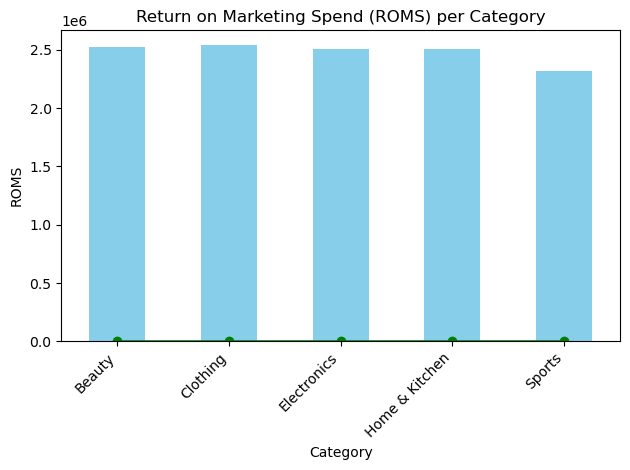

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from fpdf import FPDF


# Function to calculate KPIs and generate visualizations
def generate_report():
    # Load the dataset
    df = pd.read_excel('file:///C:/Users/Asus/Downloads/Sales%20Data.xls')  # Adjust the path as needed

    # Convert 'Date' column to datetime type
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate yearly KPIs
    df['Year'] = df['Date'].dt.year

    # Total Sales per Category
    total_sales_per_category = df.groupby('Category')['TotalSales'].sum()

    # Average Order Value (AOV) per Category
    df['AOV'] = df['TotalSales'] / df['QuantitySold']
    aov_per_category = df.groupby('Category')['AOV'].mean()

    # Return on Marketing Spend (ROMS) per Category
    roms_per_category = total_sales_per_category / (df.groupby('Category')['QuantitySold'].sum())

    # Combine all KPIs into a single DataFrame for better clarity
    kpi_df = pd.DataFrame({
        'Total Sales': total_sales_per_category,
        'AOV': aov_per_category,
        'ROMS': roms_per_category
    })

    # Save Total Sales bar chart
    total_sales_per_category.plot(kind='bar', color='skyblue')
    plt.title('Total Sales per Category')
    plt.xlabel('Category')
    plt.ylabel('Total Sales ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('total_sales_per_category.png')

    # Save AOV line graph
    aov_per_category.plot(kind='line', marker='o', color='green')
    plt.title('Average Order Value (AOV) per Category')
    plt.xlabel('Category')
    plt.ylabel('Average Order Value ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('aov_per_category.png')

    # Save ROMS bar chart
    roms_per_category.plot(kind='bar', color='orange')
    plt.title('Return on Marketing Spend (ROMS) per Category')
    plt.xlabel('Category')
    plt.ylabel('ROMS')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('roms_per_category.png')

    # Initialize PDF
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()

    # Set title
    pdf.set_font('Arial', 'B', 16)
    pdf.cell(200, 10, txt="Sales Data Analysis Report", ln=True, align='C')

    # Add KPIs table
    pdf.ln(10)
    pdf.set_font('Arial', 'B', 12)
    pdf.cell(40, 10, 'Category', 1)
    pdf.cell(60, 10, 'Total Sales ($)', 1)
    pdf.cell(60, 10, 'Average Order Value ($)', 1)
    pdf.cell(60, 10, 'ROMS', 1)
    pdf.ln()

    # Add KPI values
    pdf.set_font('Arial', '', 12)
    for category, row in kpi_df.iterrows():
        pdf.cell(40, 10, category, 1)
        pdf.cell(60, 10, f"${row['Total Sales']:,.2f}", 1)
        pdf.cell(60, 10, f"${row['AOV']:,.2f}", 1)
        pdf.cell(60, 10, f"{row['ROMS']:.2f}", 1)
        pdf.ln()

    # Add visualizations to the PDF
    pdf.ln(10)
    pdf.image('total_sales_per_category.png', x=10, w=180)

    pdf.ln(10)
    pdf.image('aov_per_category.png', x=10, w=180)

    pdf.ln(10)
    pdf.image('roms_per_category.png', x=10, w=180)

    # Output the PDF
    pdf.output('Sales_Data_Analysis_Report.pdf')
    print("Report generated successfully!")

# Run the report generation function
generate_report()



In [7]:
# Load the dataset
df = pd.read_excel('file:///C:/Users/Asus/Downloads/Sales%20Data.xls')  # Adjust the file path if necessary


In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df['Year'] = df['Date'].dt.year

In [21]:
total_sales_per_category = df.groupby('Category')['TotalSales'].sum()
total_sales_per_category

Category
Beauty            2521863.25
Clothing          2541567.81
Electronics       2507714.53
Home & Kitchen    2512717.26
Sports            2319104.39
Name: TotalSales, dtype: float64

In [23]:
df['AOV'] = df['TotalSales'] / df['QuantitySold']
aov_per_category = df.groupby('Category')['AOV'].mean()
aov_per_category

Category
Beauty            252.661091
Clothing          249.859971
Electronics       250.500341
Home & Kitchen    251.709286
Sports            256.662927
Name: AOV, dtype: float64

In [24]:
roms_per_category = total_sales_per_category / (df.groupby('Category')['QuantitySold'].sum())
roms_per_category

Category
Beauty            251.256675
Clothing          252.064644
Electronics       247.895861
Home & Kitchen    250.470221
Sports            259.030983
dtype: float64

In [25]:
kpi_df = pd.DataFrame({
    'Total Sales': total_sales_per_category,
    'AOV': aov_per_category,
    'ROMS': roms_per_category
})


print(kpi_df)

                Total Sales         AOV        ROMS
Category                                           
Beauty           2521863.25  252.661091  251.256675
Clothing         2541567.81  249.859971  252.064644
Electronics      2507714.53  250.500341  247.895861
Home & Kitchen   2512717.26  251.709286  250.470221
Sports           2319104.39  256.662927  259.030983


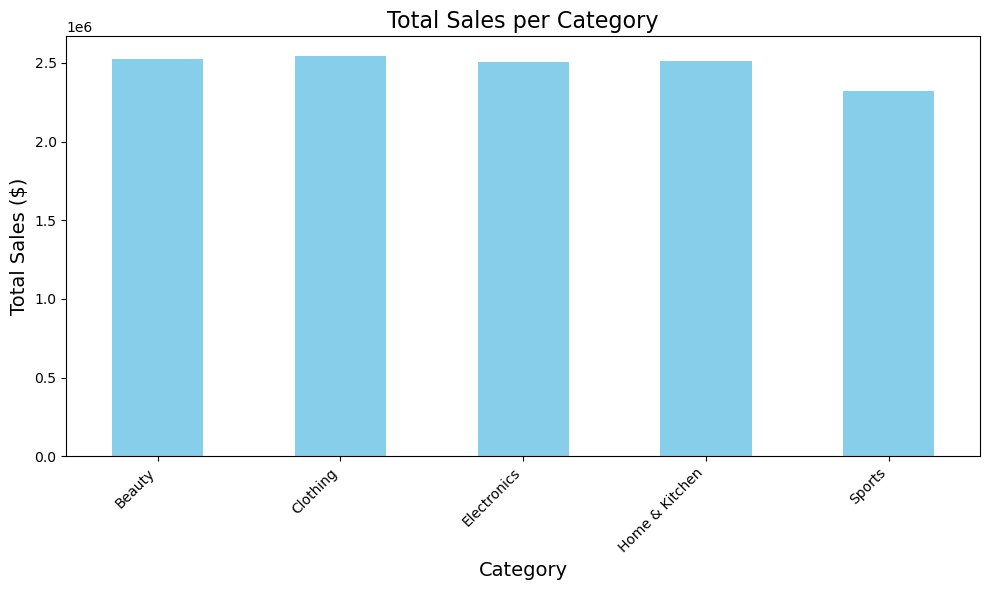

In [26]:
plt.figure(figsize=(10,6))
total_sales_per_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

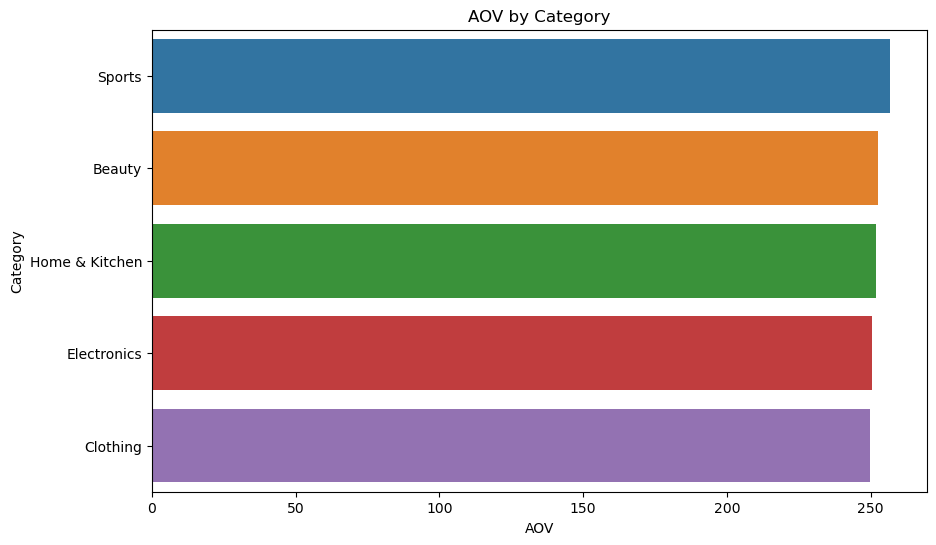

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AOV', y='Category', data=aov)
plt.title('AOV by Category')
plt.xlabel('AOV')
plt.ylabel('Category')
plt.show()


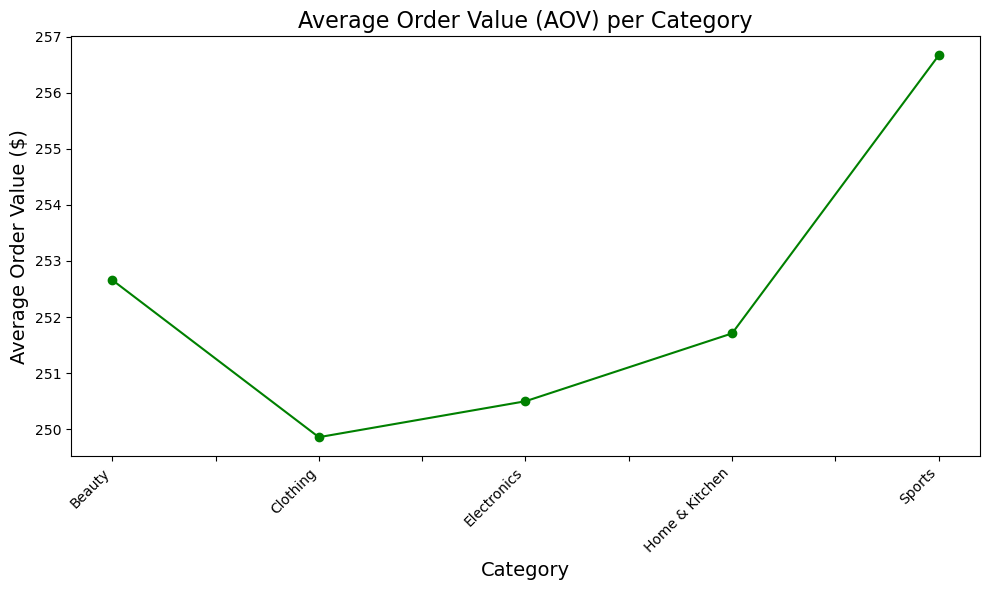

In [27]:
plt.figure(figsize=(10,6))
aov_per_category.plot(kind='line', marker='o', color='green')
plt.title('Average Order Value (AOV) per Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Order Value ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

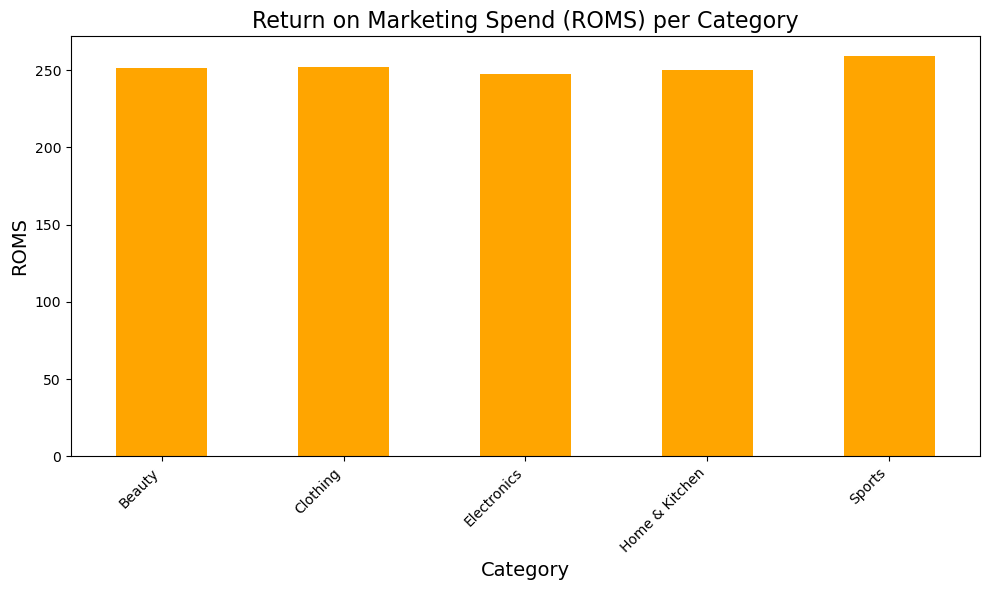

In [28]:
plt.figure(figsize=(10,6))
roms_per_category.plot(kind='bar', color='orange')
plt.title('Return on Marketing Spend (ROMS) per Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('ROMS', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_17260\1859544774.py:43: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Asus\AppData\Local\Temp\ipykernel_17260\1859544774.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


''

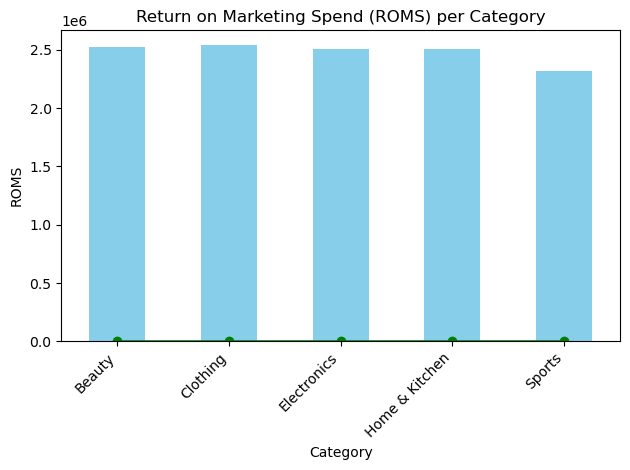

In [29]:
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Set title
pdf.set_font('Arial', 'B', 16)
pdf.cell(200, 10, txt="Sales Data Analysis Report", ln=True, align='C')

# Add KPIs table
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(40, 10, 'Category', 1)
pdf.cell(60, 10, 'Total Sales ($)', 1)
pdf.cell(60, 10, 'Average Order Value ($)', 1)
pdf.cell(60, 10, 'ROMS', 1)
pdf.ln()

# Add KPI values
pdf.set_font('Arial', '', 12)
for category, row in kpi_df.iterrows():
    pdf.cell(40, 10, category, 1)
    pdf.cell(60, 10, f"${row['Total Sales']:,.2f}", 1)
    pdf.cell(60, 10, f"${row['AOV']:,.2f}", 1)
    pdf.cell(60, 10, f"{row['ROMS']:.2f}", 1)
    pdf.ln()

# Save the visualizations to images
# Save Total Sales bar chart
total_sales_per_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('total_sales_per_category.png')

# Save AOV line graph
aov_per_category.plot(kind='line', marker='o', color='green')
plt.title('Average Order Value (AOV) per Category')
plt.xlabel('Category')
plt.ylabel('Average Order Value ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('aov_per_category.png')

# Save ROMS bar chart
roms_per_category.plot(kind='bar', color='orange')
plt.title('Return on Marketing Spend (ROMS) per Category')
plt.xlabel('Category')
plt.ylabel('ROMS')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('roms_per_category.png')

# Add Total Sales bar chart to the PDF
pdf.ln(10)
pdf.image('total_sales_per_category.png', x=10, w=180)

# Add AOV line graph to the PDF
pdf.ln(10)
pdf.image('aov_per_category.png', x=10, w=180)

# Add ROMS bar chart to the PDF
pdf.ln(10)
pdf.image('roms_per_category.png', x=10, w=180)

# Output the PDF
pdf.output('Sales_Data_Analysis_Report.pdf')